In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

# Machine learning - predictive advertising model

In [192]:
dff=pd.read_csv('Advertising_Data.csv')

In [146]:
dff.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


### The advertising data set includes many predictor variables such as TV and Social_media, and the response variable is Product_Sold.

# Exploratory Data Analysis

In [221]:
dff.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,518.384714,504.007811,511.332391,490.485993,465.492559,486.560000,7045.851852
std,287.574334,273.763161,284.060309,272.088798,288.406235,276.532204,1639.946186
min,4.330000,3.630000,14.860000,11.690000,0.770000,6.740000,3141.000000
25%,274.300000,283.190000,251.560000,271.620000,208.480000,270.870000,5934.000000
50%,515.560000,533.830000,528.760000,487.630000,480.550000,451.650000,7054.000000
75%,773.820000,741.230000,760.180000,694.840000,702.960000,720.360000,8277.000000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,11210.000000


<AxesSubplot:>

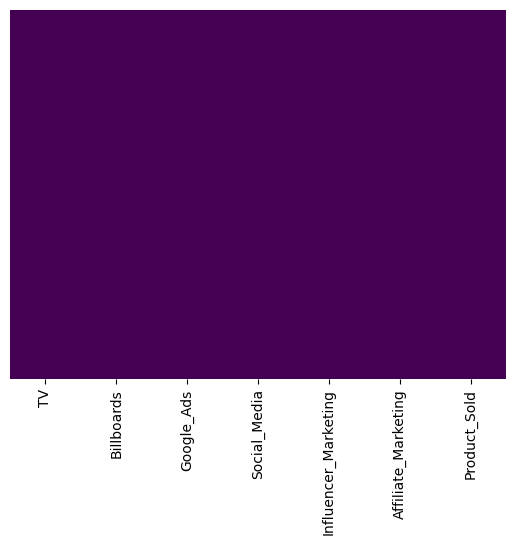

In [104]:
sns.heatmap(dff.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#check missing data
#It shows no missing data

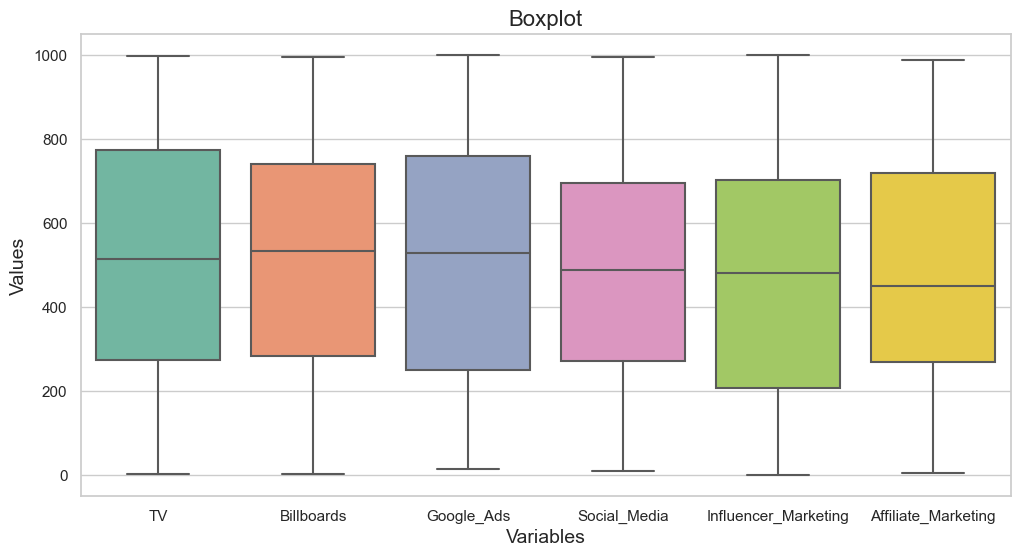

In [190]:
sns.set(style="whitegrid")

# Box-plot visualization without the 'Product_Sold' column 
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.boxplot(data=dff.drop(columns=['Product_Sold']), palette="Set2")

#  title and labels
plt.title('Boxplot', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Show the plot
plt.show()

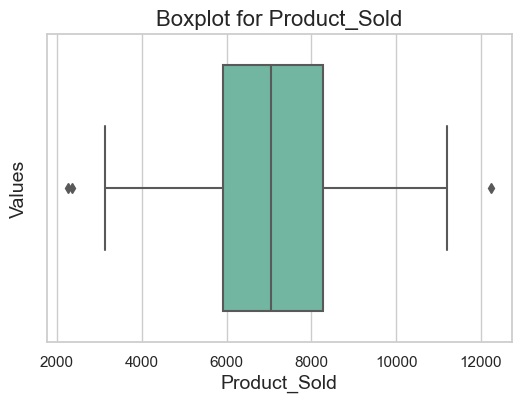

In [212]:
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.boxplot(x=dff['Product_Sold'], palette="Set2")

#   title and labels for the 'Product_Sold' boxplot
plt.title('Boxplot for Product_Sold', fontsize=16)
plt.xlabel('Product_Sold', fontsize=14)
plt.ylabel('Values', fontsize=14)

# the 'Product_Sold' boxplot
plt.show()

In [172]:
Q1 = dff.quantile(0.25)
Q3 = dff.quantile(0.75)
IQR = Q3 - Q1

outliers = ((dff < (Q1 - 1.5 * IQR)) | (dff > (Q3 + 1.5 * IQR))).any(axis=1)

#  the number of outliers
num_outliers = outliers.sum()
print(f'The number of outliers using IQR method: {num_outliers}')

The number of outliers using IQR method: 3


In [220]:
Q1 = dff['Product_Sold'].quantile(0.25)
Q3 = dff['Product_Sold'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#   rows with outliers
outliers = dff[(dff['Product_Sold'] < lower_bound) | (dff['Product_Sold'] > upper_bound)]

#   DataFrame without outliers
dff = dff[(dff['Product_Sold'] >= lower_bound) & (dff['Product_Sold'] <= upper_bound)]

<Figure size 2000x800 with 0 Axes>

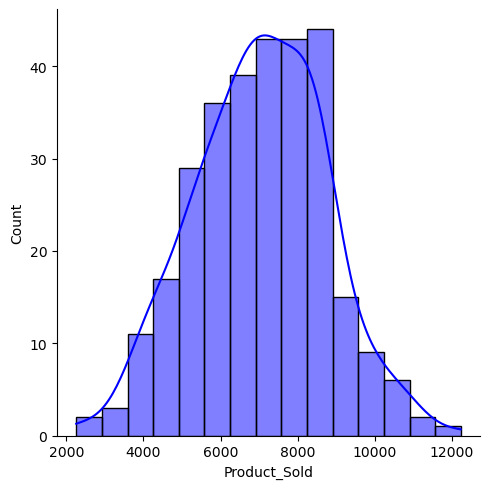

In [25]:
## Distribution plot of dependent variable(Product_Sold)
plt.figure(figsize=(10,4),dpi=200)
sns.displot(data=dff,x='Product_Sold',kde=True,color='Blue')

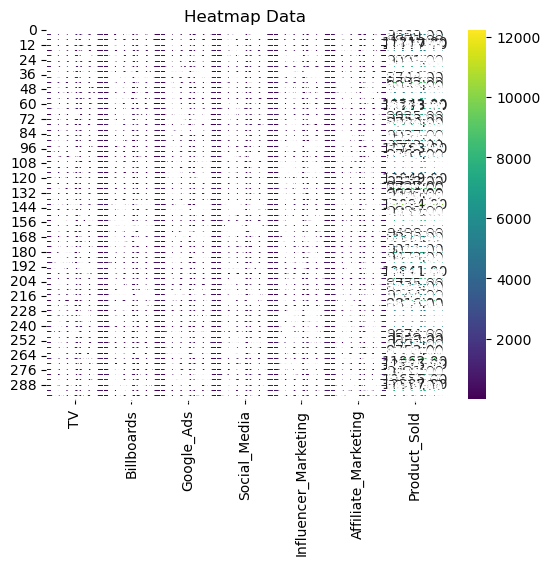

In [38]:
sns.heatmap(dff, cmap='viridis', annot=True, fmt='.2f', linewidths=.5)

plt.title('Heatmap Data')
plt.show()

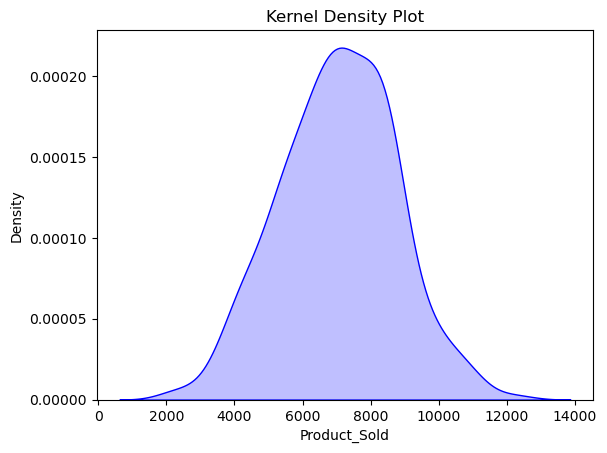

In [32]:
sns.kdeplot(dff['Product_Sold'], color='blue', shade=True)
plt.xlabel('Product_Sold')
plt.title('Kernel Density Plot')
plt.show()

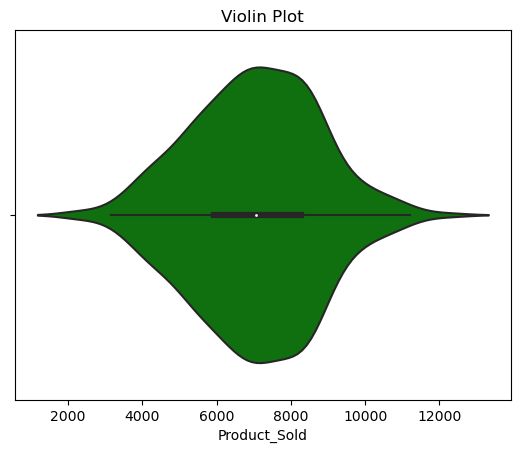

In [33]:
sns.violinplot(x=dff['Product_Sold'], color='green')
plt.title('Violin Plot')
plt.show()

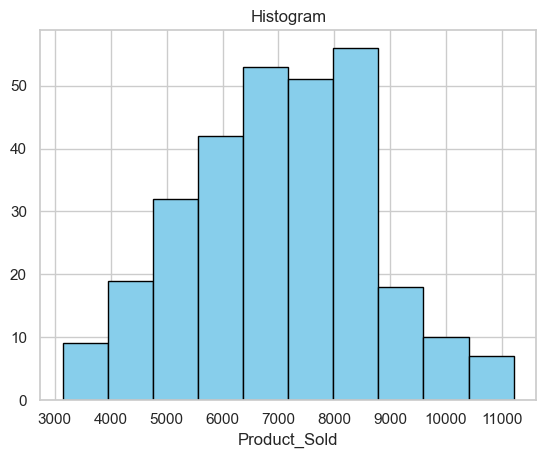

In [186]:
plt.hist(dff['Product_Sold'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Product_Sold')
plt.title('Histogram')
plt.show()

<Figure size 2000x800 with 0 Axes>

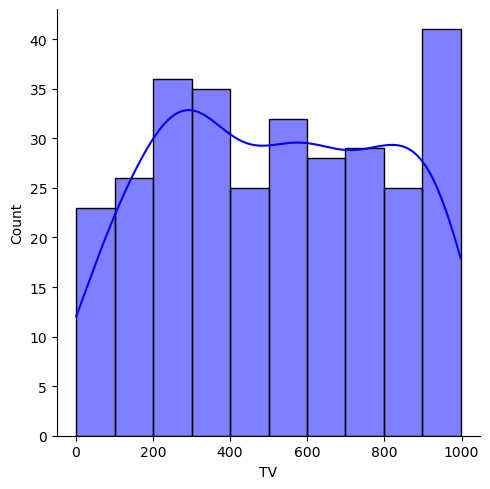

In [39]:
# 
plt.figure(figsize=(10,4),dpi=200)
sns.displot(data=dff,x='TV',kde=True,color='Blue')

<Figure size 2000x800 with 0 Axes>

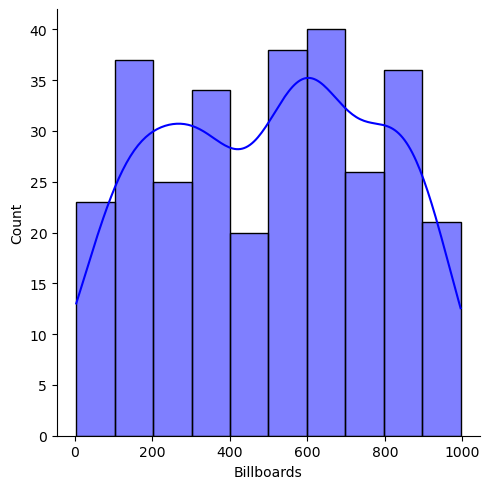

In [41]:
plt.figure(figsize=(10,4),dpi=200)
sns.displot(data=dff,x='Billboards',kde=True,color='Blue')

<Figure size 2000x800 with 0 Axes>

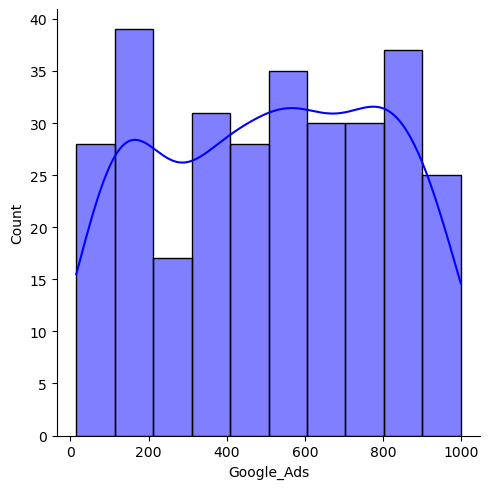

In [43]:
plt.figure(figsize=(10,4),dpi=200)
sns.displot(data=dff,x='Google_Ads',kde=True,color='Blue')

<Figure size 2000x800 with 0 Axes>

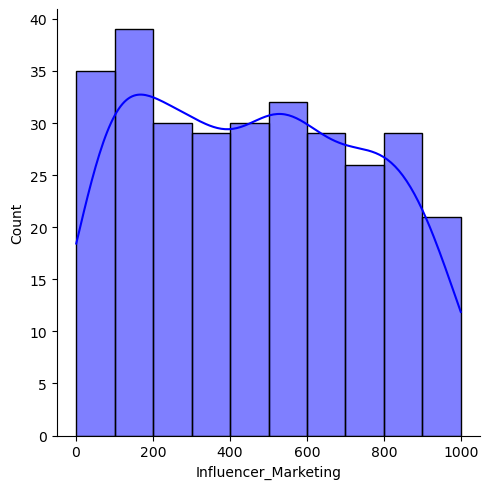

In [47]:
plt.figure(figsize=(10,4),dpi=200)
sns.displot(data=dff,x='Influencer_Marketing',kde=True,color='Blue')

<Figure size 2000x800 with 0 Axes>

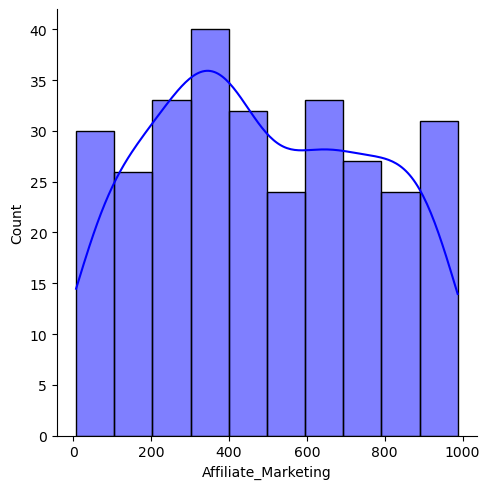

In [48]:
plt.figure(figsize=(10,4),dpi=200)
sns.displot(data=dff,x='Affiliate_Marketing',kde=True,color='Blue')

In [106]:
dff.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


# Model Selection

In [214]:

X=dff.drop('Product_Sold',axis=1)
y=dff['Product_Sold']

In [215]:
#split the data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [216]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score


In [217]:

#Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [218]:
##Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression - Mean Squared Error: {mse_linear:.2f}, R-squared: {r2_linear:.2f}")


Linear Regression - Mean Squared Error: 127.76, R-squared: 1.00


In [210]:
#DicisionTree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree - Mean Squared Error: {mse_tree:.2f}, R-squared: {r2_tree:.2f}")


Decision Tree - Mean Squared Error: 1221709.57, R-squared: 0.57


In [161]:
#Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}, R-squared: {r2_rf:.2f}")

Random Forest - Mean Squared Error: 435433.68, R-squared: 0.85


In [158]:

# K-Nearest Neighbors (KNN) model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors - Mean Squared Error: {mse_knn:.2f}, R-squared: {r2_knn:.2f}")

K-Nearest Neighbors - Mean Squared Error: 342470.41, R-squared: 0.88


In [184]:
#Gradient Boosting model
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - Mean Squared Error: {mse_gb:.2f}, R-squared: {r2_gb:.2f}")


Gradient Boosting - Mean Squared Error: 212011.88, R-squared: 0.92


#### Linear regression model is the the best model because had lowest Mean Square Error.

# cross-validation

In [219]:
X_train_scaled, y_train

#  a linear regression model
linear_model = LinearRegression()

#  5-fold cross-validation
cross_val_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
#
mse_scores = -cross_val_scores

# the mean and standard deviation of the MSE scores
print(f'Mean Cross-Validated MSE: {np.mean(mse_scores):.2f}')
print(f'Standard Deviation of Cross-Validated MSE: {np.std(mse_scores):.2f}')

Mean Cross-Validated MSE: 110.59
Standard Deviation of Cross-Validated MSE: 17.11


## The model is ready for making predictions on unseen data.